In [1]:
cd ..

/home/savannahgramze/codeastro/astropixel


/home/savannahgramze/anaconda3/envs/codeastro/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import catalog_querry
import cutout
import plot_stars


In [3]:
from astroquery.sdss import SDSS

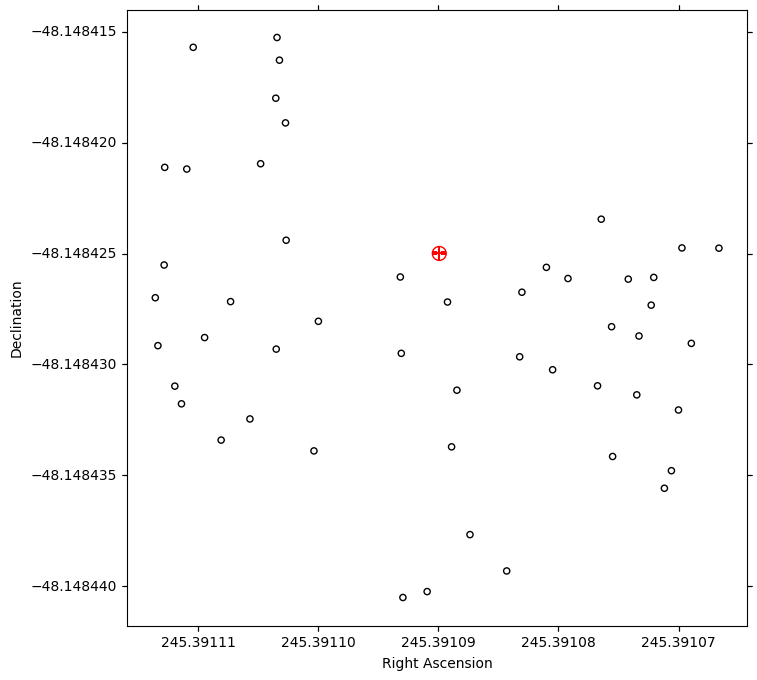

In [5]:
plot_stars.plot_random_field()

In [5]:
#coord = SkyCoord.from_name('Sirius')#
coord = catalog_querry.get_random_coordinates_gal().icrs

In [6]:
coord.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (269.20671574, -18.41033015)>

In [7]:
cat = catalog_querry.get_2mass_catalog(coord, 1*u.arcmin)

In [8]:
cat

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
269.207525,-18.423075,17564980-1825230,15.282,0.049,14.219,0.040,13.885,0.053,BCB,222,111,000,0,0
269.207051,-18.418009,17564969-1825048,12.607,0.047,12.355,0.035,12.285,0.032,AAA,222,222,ccc,0,0
269.207045,-18.402493,17564969-1824089,15.954,0.077,14.472,0.075,13.905,0.051,DDB,222,111,000,0,0
269.209329,-18.419245,17565023-1825092,15.930,0.092,14.965,--,14.965,--,DUU,200,100,c00,0,0
269.208602,-18.410770,17565006-1824387,15.468,0.051,13.984,0.044,13.380,0.035,BCA,222,111,c00,0,0
269.207273,-18.400286,17564974-1824010,14.913,0.071,13.735,0.068,13.289,0.055,ABA,222,111,000,0,0
269.207077,-18.404686,17564969-1824168,17.916,--,14.276,0.028,16.127,--,UEU,020,010,000,0,0
269.207850,-18.426130,17564988-1825340,15.224,0.049,14.351,0.049,13.901,0.046,BDB,222,111,000,0,0


In [9]:
from astropy.wcs import WCS

# Create a new WCS
wcs = WCS(naxis=2)
wcs.wcs.crpix = [500, 500]  # Set the reference pixel to the center of the image
wcs.wcs.crval = [coord.ra.deg, coord.dec.deg]  # Set the reference value to the given coordinates
wcs.wcs.cdelt = np.array([-0.001, 0.001])  # Set the pixel scale (assuming 0.001 degrees per pixel)

# Print the WCS information
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : '' '' 
CRVAL : 269.2067157435185 -18.410330150242828 
CRPIX : 500.0 500.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.001 0.001 
NAXIS : 0  0


Text(0, 0.5, 'Dec')

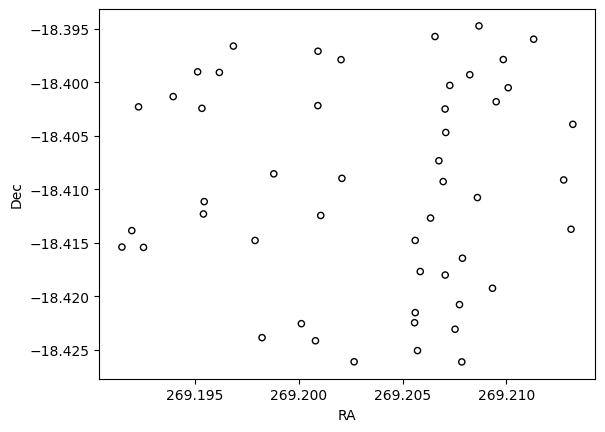

In [10]:
ax = plt.subplot(111, transform=wcs.celestial)
ax.scatter(cat['RAJ2000'], cat['DEJ2000'], s=20, edgecolor='k', facecolor='none')

ax.set_xlabel('RA')
ax.set_ylabel('Dec')